### Dominant color extraction for image segmentation


##### Image Segmentation

###### -Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
###### -We will try to extract the most dominant 'K' Colors using K-Means
###### -We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [17]:
img = cv2.imread("elephant.jpg")
print(img.shape)

(330, 500, 3)


In [32]:
cv2.imshow('Elephant',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
#Flatten each channel of the image

In [18]:
all_pixels = img.reshape((330*500,3))
#all_pixels = img.reshape((-1,3))

In [19]:
print(all_pixels.shape)

(165000, 3)


In [21]:
dominant_colors = 4
km = KMeans(n_clusters=dominant_colors)

In [22]:
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
centers = km.cluster_centers_

In [27]:
centers = np.array(centers,dtype='uint8')

In [28]:
print(centers)

[[128 145 174]
 [  1   0   1]
 [117  94  98]
 [ 64  35  38]]


In [29]:
#Plot what all these colors are

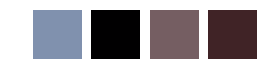

In [36]:
i = 1
color = []

plt.figure(0,figsize=(4,2))

for each_color in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    color.append(each_color)
    
    #color Swatch
    
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_color
    plt.imshow(a)
    
plt.show()   

In [37]:
new_image = np.zeros((330*500,3),dtype='uint8')
print(new_image.shape)

(165000, 3)


In [39]:
color

[array([128, 145, 174], dtype=uint8),
 array([1, 0, 1], dtype=uint8),
 array([117,  94,  98], dtype=uint8),
 array([64, 35, 38], dtype=uint8)]

In [40]:
km.labels_

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

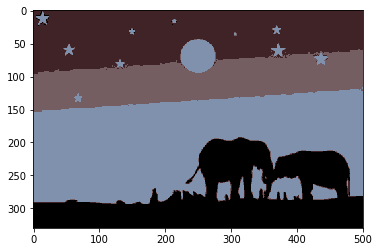

In [41]:
for ix in range(new_image.shape[0]):
    new_image[ix] = color[km.labels_[ix]]
    
new_image = new_image.reshape((330,500,3))
plt.imshow(new_image)
plt.show()